# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_ecfp6 = pd.read_csv('data_ecfp6_bits_eib.csv', header=None)
df_maccs = pd.read_csv('data_maccs_eib.csv', header=None)
frames = [df_ecfp6, df_maccs]

In [4]:
df = pd.concat(frames, axis=1, join="inner")
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
import numpy as np
X = np.array(df)

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [7]:
data = pd.read_csv('eib_optimized.csv').eib

In [8]:
data.head()

0    3.782229
1    3.974097
2    4.023885
3    1.202427
4    4.005296
Name: eib, dtype: float64

In [9]:
Y = np.array(data)

In [10]:
Y.shape

(1826,)

In [11]:
X.shape

(1826, 2215)

In [12]:
from sklearn.feature_selection import RFE
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((1460, 2215), (1460,))

In [14]:
X_test.shape, Y_test.shape

((366, 2215), (366,))

# Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [25]:
gbt = GradientBoostingRegressor(random_state=3, n_estimators=1500, learning_rate=0.01, max_depth=10, subsample=0.5)

In [26]:
gbt.fit(X_train, Y_train)
r2_train_gbt = gbt.score(X_train, Y_train)
r2_test_gbt = gbt.score(X_test, Y_test)

In [27]:
r2_train_gbt, r2_test_gbt

(0.9866751122964287, 0.659660571900675)

In [51]:
Y_pred_gbt = gbt.predict(X_test)
Y_pred_train_gbt = gbt.predict(X_train)

/Users/sachith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

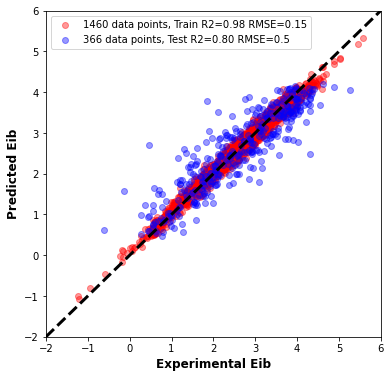

In [55]:
ax_gbt = sns.regplot(Y_train, Y_pred_train_gbt, color='r', scatter_kws={'alpha':0.4}, fit_reg=False)
ax_gbt = sns.regplot(Y_test, Y_pred_gbt, color='b', scatter_kws={'alpha':0.4}, fit_reg=False)

ax_gbt.set_xlabel('Experimental Eib', fontsize='large', fontweight='bold')
ax_gbt.set_ylabel('Predicted Eib', fontsize='large', fontweight='bold')
ax_gbt.set_xlim(-2, 6)
ax_gbt.set_ylim(-2, 6)
xpoints = ypoints = plt.xlim()

ax_gbt.legend(labels=["1460 data points, Train R2=0.98 RMSE=0.15","366 data points, Test R2=0.80 RMSE=0.5"])
ax_gbt.figure.set_size_inches(6, 6)
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show

In [56]:
r2_score(Y_train, Y_pred_train_gbt) , r2_score(Y_test, Y_pred_gbt) 

(0.981801506441329, 0.8008324816827321)

In [57]:
mean_squared_error(Y_train, Y_pred_train_gbt)**0.5, mean_squared_error(Y_test, Y_pred_gbt)**0.5

(0.15042473629821962, 0.49994675552714835)